## CAPSTONE PROJECT BENGKEL CODING DATA SCIENCE

In [99]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

## 1. Pengumpulan data

In [100]:
dir = 'heart+disease/hungarian.data'
with open(dir, encoding='latin1') as file:
    lines = [line.strip() for line in file]

lines[0:10]

['1254 0 40 1 1 0 0',
 '-9 2 140 0 289 -9 -9 -9',
 '0 -9 -9 0 12 16 84 0',
 '0 0 0 0 150 18 -9 7',
 '172 86 200 110 140 86 0 0',
 '0 -9 26 20 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 -9 -9 12',
 '20 84 0 -9 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 1 1 1',
 '1 1 -9. -9. name']

## 2. Menelaah Data



In [101]:
data = itertools.takewhile(
    lambda x: len(x) == 76,
    (' '.join(lines[i:(i + 10)]).split()
    for i in range(0, len(lines), 10))
)

df = pd.DataFrame.from_records(data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1254,0,40,1,1,0,0,-9,2,140,...,-9,-9,1,1,1,1,1,-9.,-9.,name
1,1255,0,49,0,1,0,0,-9,3,160,...,-9,-9,1,1,1,1,1,-9.,-9.,name
2,1256,0,37,1,1,0,0,-9,2,130,...,-9,-9,1,1,1,1,1,-9.,-9.,name
3,1257,0,48,0,1,1,1,-9,4,138,...,2,-9,1,1,1,1,1,-9.,-9.,name
4,1258,0,54,1,1,0,1,-9,3,150,...,1,-9,1,1,1,1,1,-9.,-9.,name


Dari hasil diatas menghasilkan tabel berisi 76 fitur yang nanti akan di seleksi kembali.

## 3. Validasi Data

Didalam dataset ini nilai-9.0 merupakan nilai NULL oleh karena itu mengubah agar dataset ini sesuai.

In [102]:
# Melakukan penghapusan pada kolom ke 1 serta mengubah tipe data menjadi float agar sesuai dengan nilai null
df = df.iloc[:, :-1]
df = df.drop(df.columns[0], axis=1)
df = df.astype(float)

In [103]:
# Mengganti nilai -9.0 menjadi NaN/Null
df.replace(-9.0, np.nan, inplace=True)
df.head()

,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,0.0,40.0,1.0,1.0,0.0,0.0,NaN,2.0,140.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,0.0,49.0,0.0,1.0,0.0,0.0,NaN,3.0,160.0,1.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,0.0,37.0,1.0,1.0,0.0,0.0,NaN,2.0,130.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
3,0.0,48.0,0.0,1.0,1.0,1.0,NaN,4.0,138.0,0.0,...,NaN,2.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,0.0,54.0,1.0,1.0,0.0,1.0,NaN,3.0,150.0,0.0,...,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN


In [104]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       0 non-null      float64
 7   8       294 non-null    float64
 8   9       293 non-null    float64
 9   10      293 non-null    float64
 10  11      271 non-null    float64
 11  12      12 non-null     float64
 12  13      1 non-null      float64
 13  14      0 non-null      float64
 14  15      286 non-null    float64
 15  16      21 non-null     float64
 16  17      1 non-null      float64
 17  18      293 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      293 non-null    float64
 22  23

Langkah yang sudah dijalankan:

1. Melakukan penghapusan kolom ke 0 karna hanya berisi index no id, serta kolom ke 75 yang berupa nama pasien bertipe data string.
2. Melakukan perubahan tipe data menjadi float menyesuaikan nilai null = -9.0
3. Melakukan nilai value -9.0 menjadi Nan/Null

## 4. Menentukan Object Data

Memilih 14 fitur yang bisa digunakan sesuai dengan deskripsi dataset.

In [105]:
df_select = df.iloc[:, [1, 2, 7, 8, 10, 14, 17, 30, 36, 38, 39, 42, 49, 56]]
df_select.head()

,2,3,8,9,11,15,18,31,37,39,40,43,50,57
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,NaN,NaN,NaN,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,NaN,NaN,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,NaN,NaN,NaN,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,NaN,NaN,3.0
4,54.0,1.0,3.0,150.0,NaN,0.0,0.0,122.0,0.0,0.0,NaN,NaN,NaN,0.0


Memberikan nama pada masing-masing fitur yang sudah di tentukan.

In [106]:
column_mapping = {
    2: 'age',
    3: 'sex',
    8: 'cp',
    9: 'trestbps',
    11: 'chol',
    15: 'fbs',
    18: 'restecg',
    31: 'thalach',
    37: 'exang',
    39: 'oldpeak',
    40: 'slope',
    43: 'ca',
    50: 'thal',
    57: 'target'
}

df_select.rename(columns=column_mapping, inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_16840\1102791352.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select.rename(columns=column_mapping, inplace=True)


In [107]:
df_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       286 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     104 non-null    float64
 11  ca        4 non-null      float64
 12  thal      28 non-null     float64
 13  target    294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


In [108]:
df_select.isnull().sum()

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          290
thal        266
target        0
dtype: int64

Hal yang sudah dijalankan:

1. Melakukan seleksi fitur menjadi 14
2. Memberikan nama tabel/kolom
3. Terdapat 3 kolom yang missing value lebih dari 60%

## 5. Membersihkan Data

Sebelum melakukan pemodelan dilakukan pembersihan data agar model yang dihasilkan lebih akurat.

In [109]:
df_select.isnull().sum()   

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          290
thal        266
target        0
dtype: int64

In [110]:
# Melakukan drop kolom karena berisi 60% data null
df_select.drop(['slope','ca', 'thal'], axis=1, inplace=True)
df_select.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_16840\2189532063.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select.drop(['slope','ca', 'thal'], axis=1, inplace=True)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
4,54.0,1.0,3.0,150.0,NaN,0.0,0.0,122.0,0.0,0.0,0.0


In [111]:
meanTBPS = df_select['trestbps'].dropna()
meanCHOL = df_select['chol'].dropna()
meanFBS = df_select['fbs'].dropna()
meanTHALACH = df_select['thalach'].dropna()
meanRESTECG = df_select['restecg'].dropna()
meanEXANG = df_select['exang'].dropna()

meanTBPS = meanTBPS.astype(float)
meanCHOL = meanCHOL.astype(float)
meanFBS = meanFBS.astype(float)
meanTHALACH = meanTHALACH.astype(float)
meanRESTECG = meanRESTECG.astype(float)
meanEXANG = meanEXANG.astype(float)

meanTBPS = round(meanTBPS.mean())
meanCHOL = round(meanCHOL.mean())
meanFBS = round(meanFBS.mean())
meanTHALACH = round(meanTHALACH.mean())
meanRESTECG = round(meanRESTECG.mean())
meanEXANG = round(meanEXANG.mean())

In [112]:
#mengubah nilai null dengan nilai mean
fill_values = {'trestbps': meanTBPS, 'chol': meanCHOL, 'fbs': meanFBS, 
               'thalach': meanTHALACH, 'restecg': meanRESTECG, 'exang': meanEXANG}
dfClean = df_select.fillna(value=fill_values)

dfClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  294 non-null    float64
 4   chol      294 non-null    float64
 5   fbs       294 non-null    float64
 6   restecg   294 non-null    float64
 7   thalach   294 non-null    float64
 8   exang     294 non-null    float64
 9   oldpeak   294 non-null    float64
 10  target    294 non-null    float64
dtypes: float64(11)
memory usage: 25.4 KB


In [113]:
dfClean.isnull().sum() 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
target      0
dtype: int64

In [114]:
#melakukan cek data duplikat
duplicate = dfClean.duplicated()
dfClean[duplicate]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


In [115]:
print("Jumlah data duplikat: ") 
dfClean[dfClean.duplicated(keep=False)]

Jumlah data duplikat: 


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
90,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


In [116]:
dfClean = dfClean.drop_duplicates()
print("Jumlah data duplikat: ") 
dfClean[dfClean.duplicated(keep=False)]

Jumlah data duplikat: 


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target


In [117]:
dfClean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
4,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,0.0


In [118]:
dfClean.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
age,1.000000,0.014516,0.146616,0.246571,0.087101,0.181130,0.050672,-0.460514,0.239223,0.178172,0.210429
sex,0.014516,1.000000,0.245769,0.082064,0.027695,0.044372,-0.108656,-0.106959,0.154925,0.115959,0.220732
cp,0.146616,0.245769,1.000000,0.081293,0.134697,0.031930,-0.016372,-0.367819,0.494674,0.351735,0.427536
trestbps,0.246571,0.082064,0.081293,1.000000,0.080818,0.096222,0.011256,-0.181824,0.211507,0.204000,0.214898
chol,0.087101,0.027695,0.134697,0.080818,1.000000,0.107686,0.048081,-0.122038,0.161055,0.106743,0.256027
fbs,0.181130,0.044372,0.031930,0.096222,0.107686,1.000000,0.047988,-0.069722,0.115503,0.063179,0.154319
restecg,0.050672,-0.108656,-0.016372,0.011256,0.048081,0.047988,1.000000,0.006084,0.041290,0.042193,0.042643
thalach,-0.460514,-0.106959,-0.367819,-0.181824,-0.122038,-0.069722,0.006084,1.000000,-0.400508,-0.300458,-0.367525
exang,0.239223,0.154925,0.494674,0.211507,0.161055,0.115503,0.041290,-0.400508,1.000000,0.624965,0.571710
oldpeak,0.178172,0.115959,0.351735,0.204000,0.106743,0.063179,0.042193,-0.300458,0.624965,1.000000,0.580732


<Axes: >

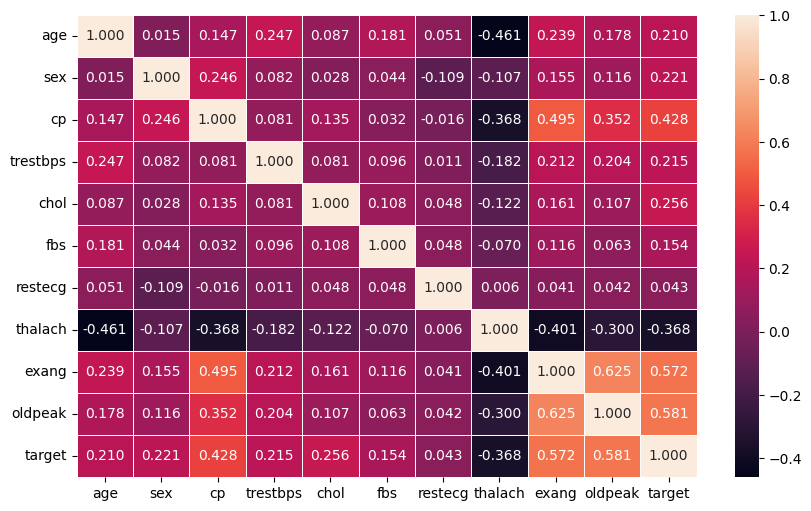

In [196]:
corr_mat = dfClean.corr()
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(corr_mat, annot=True, linewidths=0.5, fmt=".3f")

Hal yang sudah dijalankan:

1. Melakukan cek missing values.
2. Mengahapus kolom yang terdapat 60% missing values.
3. Menghapus data duplikat.
4. Menampilkan heatmap untuk mengetahui korelasi antar fitur.

## 6. Kontruksi Data

Dalam tahap ini Konstruksi data salah satu tujuannya yaitu untuk menyesuaikan semua tipe data yang ada di dalam dataset.

In [120]:
dfClean.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
4,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,0.0


In [121]:
X = dfClean.drop('target', axis=1)
y = dfClean['target']

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '2.0'),
  Text(4, 0, '4.0')])

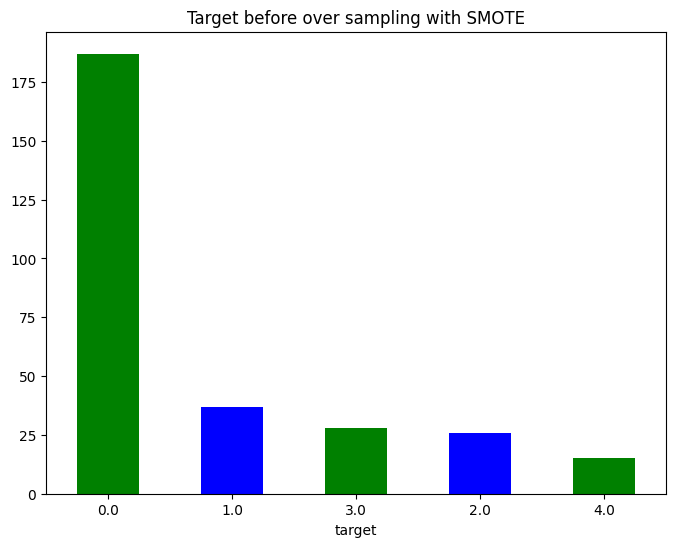

In [197]:
dfClean['target'].value_counts().plot(kind='bar', figsize=(8,6),color=['green', 'blue'])
plt.title('Target before over sampling with SMOTE')
plt.xticks(rotation=0)

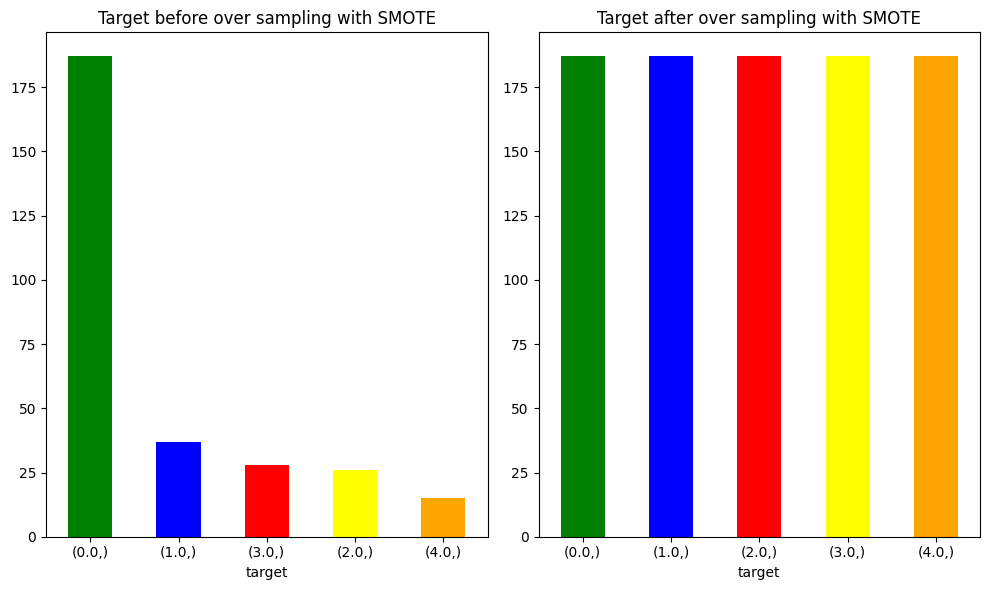

In [199]:
#Oversampling with SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, confusion_matrix, precision_score, classification_report
from sklearn.preprocessing import StandardScaler,MinMaxScaler, RobustScaler

smote = SMOTE(random_state=42)
X_smote_resample, y_smote_resample = smote.fit_resample(X, y)

plt.figure(figsize=(10,6))

new_df1 = pd.DataFrame(data=y)

plt.subplot(1, 2, 1)
new_df1.value_counts().plot(kind='bar', figsize=(10,6), color=['green', 'blue', 'red', 'yellow', 'orange'])
plt.title('Target before over sampling with SMOTE')
plt.xticks(rotation=0);

plt.subplot(1, 2, 2)
new_df2 = pd.DataFrame(data=y_smote_resample)

new_df2.value_counts().plot(kind='bar', figsize=(10,6), color=['green', 'blue', 'red', 'yellow', 'orange'])
plt.title('Target after over sampling with SMOTE')
plt.xticks(rotation=0);

plt.tight_layout()
plt.show()



In [124]:
new_df1 = pd.DataFrame(data=y)
new_df1.value_counts()

target
0.0       187
1.0        37
3.0        28
2.0        26
4.0        15
Name: count, dtype: int64

In [125]:
#Oversampling with SMOTE
new_df2 = pd.DataFrame(data=y_smote_resample)
new_df2.value_counts()

target
0.0       187
1.0       187
2.0       187
3.0       187
4.0       187
Name: count, dtype: int64

In [126]:
dfClean.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,47.822526,0.726962,2.986348,132.662116,250.860068,0.068259,0.218430,139.058020,0.303754,0.588055,0.795222
std,7.824875,0.446282,0.965049,17.576793,65.059069,0.252622,0.460868,23.558003,0.460665,0.909554,1.238251
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,248.000000,0.000000,0.000000,140.000000,0.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,277.000000,0.000000,0.000000,155.000000,1.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,4.000000


In [200]:
# Normalisasi data
scaler = MinMaxScaler()

X_smote_resample_normal = scaler.fit_transform(X_smote_resample)
dfcek1 = pd.DataFrame(X_smote_resample_normal)
dfcek1.describe()

,0,1,2,3,4,5,6,7,8,9
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,0.563739,0.842507,0.818224,0.403413,0.341027,0.094277,0.117938,0.453354,0.598398,0.227015
std,0.174873,0.332492,0.274211,0.147493,0.110990,0.252030,0.199527,0.197232,0.450288,0.201293
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.473283,1.000000,0.666667,0.305556,0.267954,0.000000,0.000000,0.312720,0.000000,0.000000
50%,0.578947,1.000000,1.000000,0.387952,0.330240,0.000000,0.000000,0.440606,0.962447,0.200000
75%,0.683363,1.000000,1.000000,0.487481,0.393811,0.000000,0.201473,0.593629,1.000000,0.386166
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [128]:
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_smote_resample, y_smote_resample, test_size=0.2, random_state=42, stratify=y_smote_resample)
# Data yg sudah dinormalisasi
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X_smote_resample_normal, y_smote_resample, test_size=0.2, random_state=42, stratify=y_smote_resample)

In [129]:
dfClean.to_csv('Dataset/dfClean.csv', index=False)

Hal yang sudah dikerjakan:

1. Melihat distribusi data
2. Melakukan smote(penyeimbangan data)
3. Melakukan Normalisasi data
4. Melakukan splitting data

## 7. Pemodelan

In [130]:
def evaluation_matrix(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    rcl = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    ps = precision_score(y_test, y_pred, average='weighted')

    metric_dict = {'accuracy': round(acc, 3),
                     'recall': round(rcl, 3),
                     'f1': round(f1, 3),
                     'precision': round(ps, 3)
                    }
    
    return print(metric_dict)
    

### KNN

In [131]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import pickle

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [132]:
# Menyimpan model
pickle.dump(knn_model, open('Model/knn_model.pkl', 'wb'))

In [133]:
y_pred_knn = knn_model.predict(X_test)

# Evaluation Matrix
print("K-Nearest Neighbors (KNN) model:")
accuracy_score_knn = round(accuracy_score(y_test, y_pred_knn),3)
print("Accuracy:", accuracy_score_knn)
print("classification Report:")
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors (KNN) model:
Accuracy: 0.754
classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.39      0.49        38
         1.0       0.73      0.81      0.77        37
         2.0       0.80      0.86      0.83        37
         3.0       0.77      0.87      0.81        38
         4.0       0.78      0.84      0.81        37

    accuracy                           0.75       187
   macro avg       0.75      0.76      0.74       187
weighted avg       0.74      0.75      0.74       187



In [134]:
evaluation_matrix(y_test, y_pred_knn)

{'accuracy': 0.754, 'recall': 0.754, 'f1': 0.741, 'precision': 0.745}


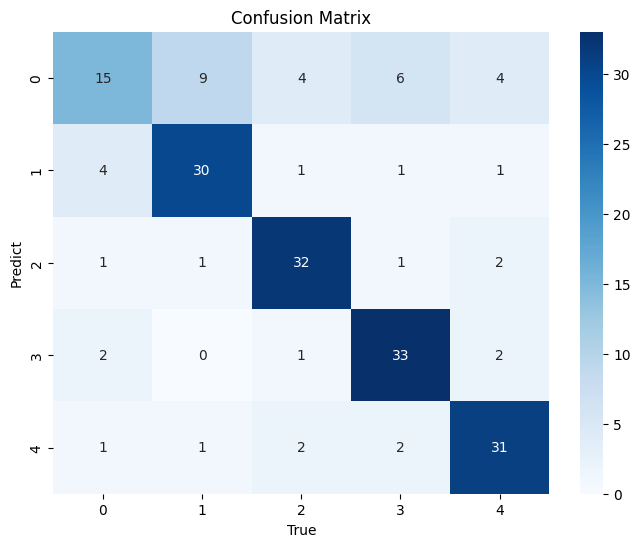

In [135]:
cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### Random Forest

In [136]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [137]:
# Menyimpan model
pickle.dump(rf_model, open('Model/rf_model.pkl', 'wb'))

In [138]:
y_pred_rf = rf_model.predict(X_test)

# Evaluation Matrix
print("\nRandom Forest model:")
accuracy_score_rf = round(accuracy_score(y_test, y_pred_rf),3)
print("Accuracy:", accuracy_score_rf)
print("classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest model:
Accuracy: 0.92
classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.85      0.92      0.88        37
         2.0       0.89      0.89      0.89        37
         3.0       0.95      0.97      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [139]:
evaluation_matrix(y_test, y_pred_rf)

{'accuracy': 0.92, 'recall': 0.92, 'f1': 0.92, 'precision': 0.922}


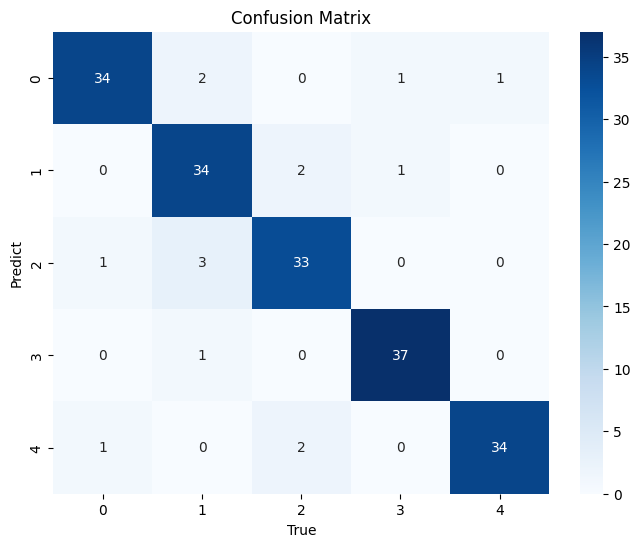

In [140]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### XGBoost

In [141]:
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [142]:
# Menyimpan model
pickle.dump(xgb_model, open('Model/xgb_model.pkl', 'wb'))

In [143]:
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation Matrix
print("\nXGBoost model:")
accuracy_score_xgb = round(accuracy_score(y_test, y_pred_xgb),3)
print("Accuracy:", accuracy_score_xgb)
print("classification Report:")
print(classification_report(y_test, y_pred_xgb))


XGBoost model:
Accuracy: 0.904
classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91        38
         1.0       0.94      0.84      0.89        37
         2.0       0.85      0.89      0.87        37
         3.0       0.88      0.97      0.93        38
         4.0       0.94      0.92      0.93        37

    accuracy                           0.90       187
   macro avg       0.91      0.90      0.90       187
weighted avg       0.91      0.90      0.90       187



In [144]:
evaluation_matrix(y_test, y_pred_xgb)

{'accuracy': 0.904, 'recall': 0.904, 'f1': 0.904, 'precision': 0.906}


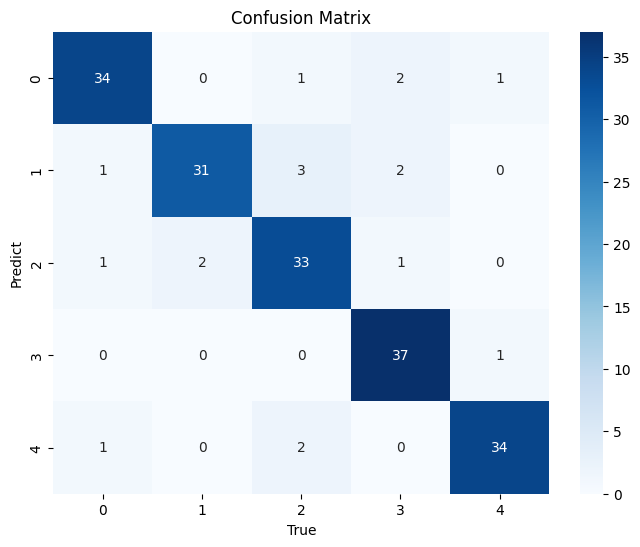

In [145]:
cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### Decision Tree Classifier

In [146]:
dtr_model = DecisionTreeClassifier(random_state=42)
dtr_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [147]:
# Menyimpan model
pickle.dump(dtr_model, open('Model/dtc_model.pkl', 'wb'))

In [148]:
y_pred_dtr = dtr_model.predict(X_test)

# Evaluation Matrix
print("\nDecision Tree Clasifier model:")
accuracy_score_dtr = round(accuracy_score(y_test, y_pred_dtr),3)
print("Accuracy:", accuracy_score_dtr)
print("classification Report:")
print(classification_report(y_test, y_pred_dtr))


Decision Tree Clasifier model:
Accuracy: 0.77
classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.82      0.78        38
         1.0       0.72      0.78      0.75        37
         2.0       0.81      0.70      0.75        37
         3.0       0.79      0.68      0.73        38
         4.0       0.80      0.86      0.83        37

    accuracy                           0.77       187
   macro avg       0.77      0.77      0.77       187
weighted avg       0.77      0.77      0.77       187



In [149]:
evaluation_matrix(y_test, y_pred_dtr)

{'accuracy': 0.77, 'recall': 0.77, 'f1': 0.769, 'precision': 0.773}


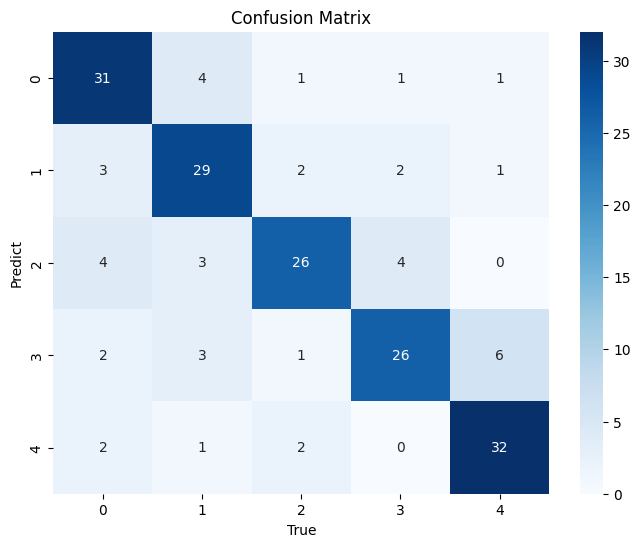

In [150]:
cm = confusion_matrix(y_test, y_pred_dtr)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### Oversampling dan Normalisasi

### KNN 

In [151]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_normal, y_train_normal)

KNeighborsClassifier(n_neighbors=3)

In [152]:
# Menyimpan model
pickle.dump(knn_model, open('Model/knn_model_normalisasi.pkl', 'wb'))

In [153]:
y_pred_knn = knn_model.predict(X_test_normal)

# Evaluation the model
print("K-Nearest Neighbors (KNN) model:")
accuracy_score_knn_smote = round(accuracy_score(y_test_normal, y_pred_knn),3)
print("Accuracy:", accuracy_score_knn_smote)
print("classification Report:")
print(classification_report(y_test_normal, y_pred_knn))

K-Nearest Neighbors (KNN) model:
Accuracy: 0.861
classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.76      0.82        38
         1.0       0.78      0.84      0.81        37
         2.0       0.87      0.92      0.89        37
         3.0       0.92      0.87      0.89        38
         4.0       0.87      0.92      0.89        37

    accuracy                           0.86       187
   macro avg       0.86      0.86      0.86       187
weighted avg       0.86      0.86      0.86       187



In [154]:
evaluation_matrix(y_test_normal, y_pred_knn)

{'accuracy': 0.861, 'recall': 0.861, 'f1': 0.861, 'precision': 0.863}


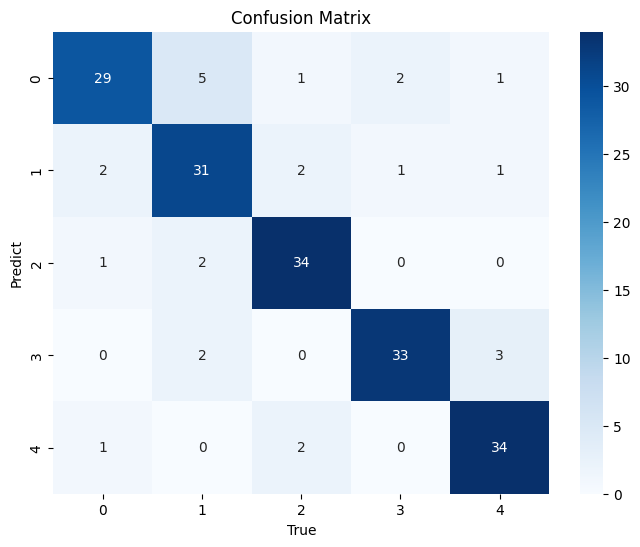

In [155]:
cm = confusion_matrix(y_test_normal, y_pred_knn)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### Random Forest

In [156]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_normal, y_train_normal)

RandomForestClassifier(random_state=42)

In [157]:
# Menyimpan model
pickle.dump(rf_model, open('Model/rf_model_normalisasi.pkl', 'wb'))

In [158]:
y_pred_rf = rf_model.predict(X_test_normal)

# Evaluation the model
print("Random Forest model:")
accuracy_score_rf_smote = round(accuracy_score(y_test_normal, y_pred_rf),3)
print("Accuracy:", accuracy_score_rf_smote)
print("classification Report:")
print(classification_report(y_test_normal, y_pred_rf))

Random Forest model:
Accuracy: 0.92
classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.85      0.92      0.88        37
         2.0       0.89      0.89      0.89        37
         3.0       0.95      0.97      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [159]:
evaluation_matrix(y_test_normal, y_pred_rf)

{'accuracy': 0.92, 'recall': 0.92, 'f1': 0.92, 'precision': 0.922}


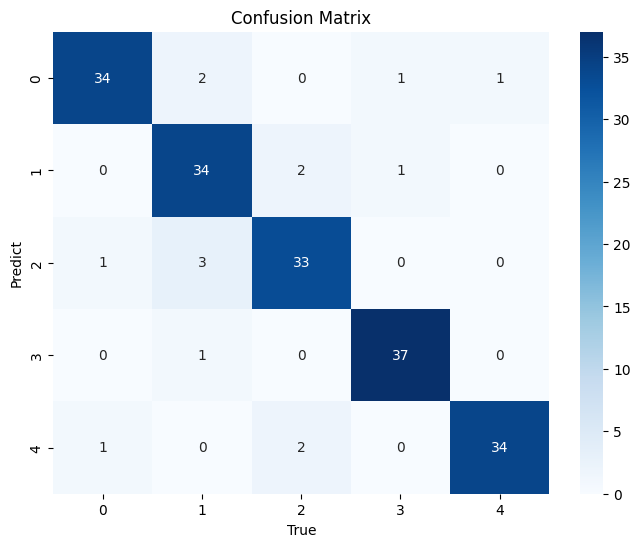

In [160]:
cm = confusion_matrix(y_test_normal, y_pred_rf)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### XGBoost

In [161]:
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train_normal, y_train_normal)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [162]:
# Menyimpan model
pickle.dump(xgb_model, open('Model/xgb_model_normalisasi.pkl', 'wb'))

In [163]:
y_pred_xgb = xgb_model.predict(X_test_normal)

# Evaluation the model
print("XGBoost model:")
accuracy_score_xgb_smote = round(accuracy_score(y_test_normal, y_pred_xgb),3)
print("Accuracy:", accuracy_score_xgb_smote)
print("classification Report:")
print(classification_report(y_test_normal, y_pred_xgb))

XGBoost model:
Accuracy: 0.904
classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91        38
         1.0       0.94      0.84      0.89        37
         2.0       0.85      0.89      0.87        37
         3.0       0.88      0.97      0.93        38
         4.0       0.94      0.92      0.93        37

    accuracy                           0.90       187
   macro avg       0.91      0.90      0.90       187
weighted avg       0.91      0.90      0.90       187



In [164]:
evaluation_matrix(y_test_normal, y_pred_xgb)

{'accuracy': 0.904, 'recall': 0.904, 'f1': 0.904, 'precision': 0.906}


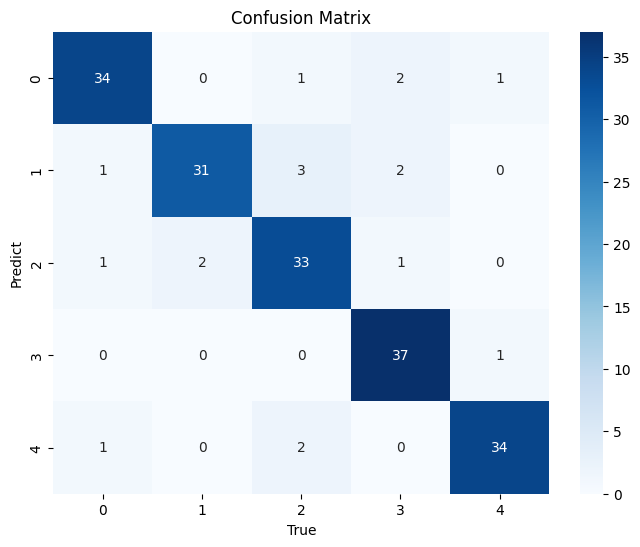

In [165]:
cm = confusion_matrix(y_test_normal, y_pred_xgb)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### Decision Tree Clasifier

In [166]:
dtc_model = DecisionTreeClassifier(random_state=42)
dtc_model.fit(X_train_normal, y_train_normal)

DecisionTreeClassifier(random_state=42)

In [167]:
# Menyimpan model
pickle.dump(dtc_model, open('Model/dtc_model_normalisasi.pkl', 'wb'))

In [168]:
y_pred_dtc = dtc_model.predict(X_test_normal)

# Evaluation the model
print("Decision Tree Clasifier model:")
accuracy_score_dtc_smote = round(accuracy_score(y_test_normal, y_pred_dtc),3)
print("Accuracy:", accuracy_score_dtc_smote)
print("classification Report:")
print(classification_report(y_test_normal, y_pred_dtc))

Decision Tree Clasifier model:
Accuracy: 0.77
classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.82      0.78        38
         1.0       0.72      0.78      0.75        37
         2.0       0.81      0.70      0.75        37
         3.0       0.79      0.68      0.73        38
         4.0       0.80      0.86      0.83        37

    accuracy                           0.77       187
   macro avg       0.77      0.77      0.77       187
weighted avg       0.77      0.77      0.77       187



In [169]:
evaluation_matrix(y_test_normal, y_pred_dtc)

{'accuracy': 0.77, 'recall': 0.77, 'f1': 0.769, 'precision': 0.773}


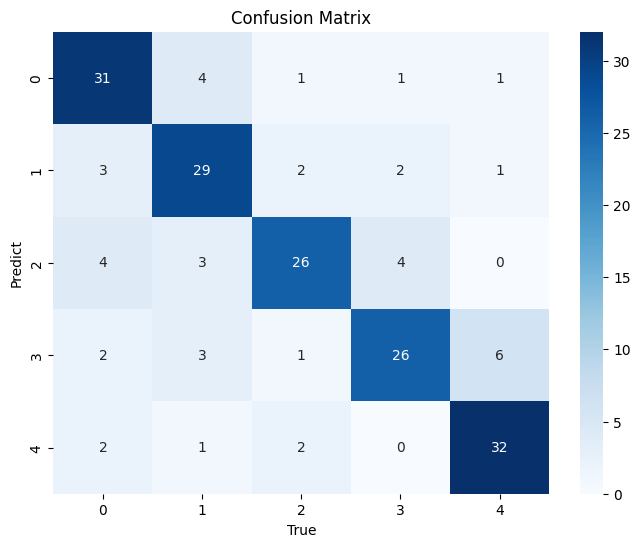

In [170]:
cm = confusion_matrix(y_test_normal, y_pred_dtc)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### Oversamppling + Normalisasi + HyperTuning

### KNN

In [171]:
knn_model = KNeighborsClassifier()

param_grid = {
    "n_neighbors": range(3, 21),
    "metric": ["euclidean", "manhattan", "minkowski"],
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree"],
    "leaf_size": range(10, 61),
}

knn_model = RandomizedSearchCV(knn_model, param_distributions=param_grid, n_iter=100, cv=5, scoring="accuracy")
knn_model.fit(X_train_normal, y_train_normal)

best_params = knn_model.best_params_
print(f"Best Params: {best_params}")

Best Params: {'weights': 'distance', 'n_neighbors': 5, 'metric': 'manhattan', 'leaf_size': 42, 'algorithm': 'kd_tree'}


In [172]:
# Menyimpan model
pickle.dump(knn_model, open('Model/knn_model_hypertuning.pkl', 'wb'))

In [173]:
y_pred_knn = knn_model.predict(X_test_normal)

# Evaluation the model
print("K-Nearest Neighbors (KNN) model:")
accuracy_score_knn_smote_tun = round(accuracy_score(y_test_normal, y_pred_knn),3)
print("Accuracy:", accuracy_score_knn_smote_tun)
print("classification Report:")
print(classification_report(y_test_normal, y_pred_knn))

K-Nearest Neighbors (KNN) model:
Accuracy: 0.92
classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.82      0.89        38
         1.0       0.82      0.86      0.84        37
         2.0       0.92      0.95      0.93        37
         3.0       0.95      0.97      0.96        38
         4.0       0.95      1.00      0.97        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [174]:
evaluation_matrix(y_test_normal, y_pred_knn)

{'accuracy': 0.92, 'recall': 0.92, 'f1': 0.919, 'precision': 0.922}


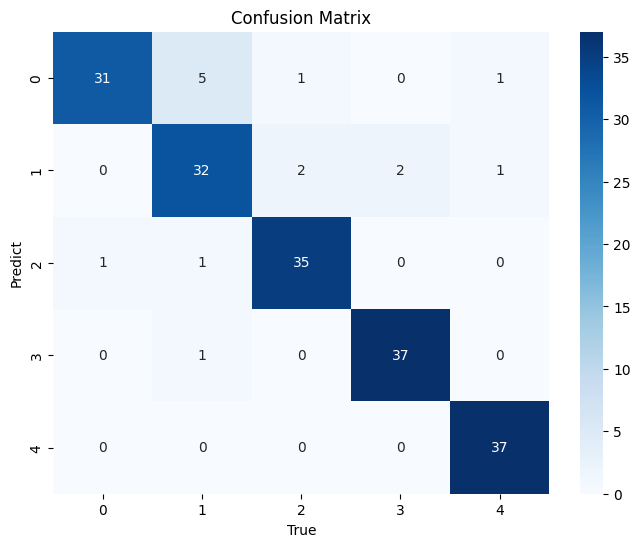

In [175]:
cm = confusion_matrix(y_test_normal, y_pred_knn)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### Random Forest

In [176]:
rf_model = RandomForestClassifier()

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [10, 15],
    "min_samples_leaf": [1, 2],
    "min_samples_split": [2, 5],
    "max_features": ["sqrt", "log2"],
    "random_state": [42, 100, 200],
}

rf_model = RandomizedSearchCV(rf_model, param_distributions=param_grid, n_iter=100, cv=5, n_jobs=-1)
rf_model.fit(X_train_normal, y_train_normal)

best_params = rf_model.best_params_
print(f"Best Params: {best_params}")

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 96 is smaller than n_iter=100. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Params: {'random_state': 42, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15}


In [177]:
# Menyimpan model
pickle.dump(rf_model, open('Model/rf_model_hypertuning.pkl', 'wb'))

In [178]:
y_pred_rf = rf_model.predict(X_test_normal)

# Evaluation the model
print("Random Forest model:")
accuracy_score_rf_smote_tun = round(accuracy_score(y_test_normal, y_pred_rf),3)
print("Accuracy:", accuracy_score_rf_smote_tun)
print("classification Report:")
print(classification_report(y_test_normal, y_pred_rf))

Random Forest model:
Accuracy: 0.914
classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.93        38
         1.0       0.87      0.89      0.88        37
         2.0       0.86      0.86      0.86        37
         3.0       0.93      0.97      0.95        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.91       187
   macro avg       0.92      0.91      0.91       187
weighted avg       0.92      0.91      0.91       187



In [179]:
evaluation_matrix(y_test_normal, y_pred_rf)

{'accuracy': 0.914, 'recall': 0.914, 'f1': 0.915, 'precision': 0.915}


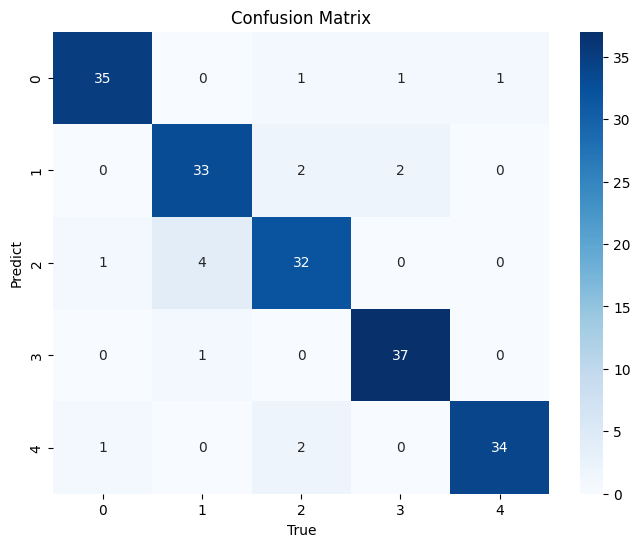

In [180]:
cm = confusion_matrix(y_test_normal, y_pred_rf)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### XGBoost

In [181]:
xgb_model = XGBClassifier()

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1],
    "gamma": [0, 0.1],
    "colsampe_bytree": [0.7, 0.8],
}

xgb_model = RandomizedSearchCV(xgb_model, param_distributions=param_grid, n_iter=10, cv=5, n_jobs=-1)
xgb_model.fit(X_train_normal, y_train_normal)

best_params = xgb_model.best_params_
print(f"Best Params: {best_params}")

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [10:40:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsampe_bytree" } are not used.

  warnings.warn(smsg, UserWarning)


Best Params: {'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0, 'colsampe_bytree': 0.8}


In [182]:
# Menyimpan model
pickle.dump(xgb_model, open('Model/xgb_model_hypertuning.pkl', 'wb'))

In [183]:
y_pred_xgb = xgb_model.predict(X_test_normal)

# Evaluation the model
print("XGBoost model:")
accuracy_score_xgb_smote_tun = round(accuracy_score(y_test_normal, y_pred_xgb),3)
print("Accuracy:", accuracy_score_xgb_smote_tun)
print("classification Report:")
print(classification_report(y_test_normal, y_pred_xgb))

XGBoost model:
Accuracy: 0.909
classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91        38
         1.0       0.91      0.78      0.84        37
         2.0       0.87      0.89      0.88        37
         3.0       0.93      1.00      0.96        38
         4.0       0.95      0.95      0.95        37

    accuracy                           0.91       187
   macro avg       0.91      0.91      0.91       187
weighted avg       0.91      0.91      0.91       187



In [184]:
evaluation_matrix(y_test_normal, y_pred_xgb)

{'accuracy': 0.909, 'recall': 0.909, 'f1': 0.908, 'precision': 0.909}


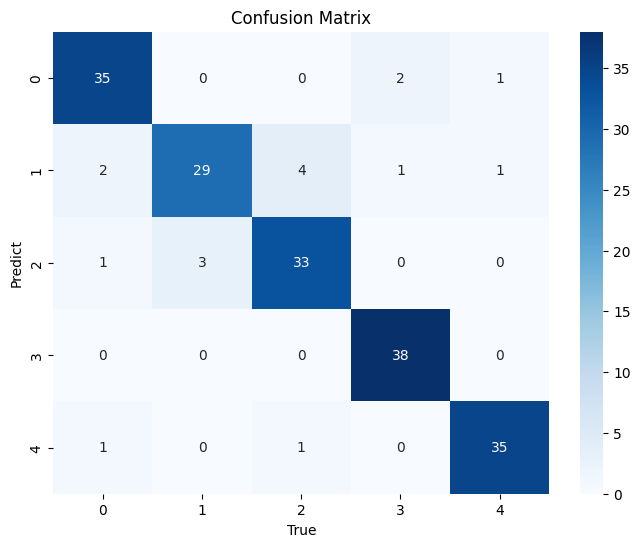

In [185]:
cm = confusion_matrix(y_test_normal, y_pred_xgb)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### Decision Tree Clasifier

In [186]:
dtc_model = DecisionTreeClassifier()

param_grid = {
    "max_depth": range(1, 50),
    "criterion": ["gini", "entropy"],
    "min_samples_split": [2, 4, 6],
    "max_features": ["auto", "sqrt", "log2"],
}

dtc_model = RandomizedSearchCV(dtc_model, param_distributions=param_grid, cv=5, verbose= True)
dtc_model.fit(X_train_normal, y_train_normal)

best_params = dtc_model.best_params_
print(f"Best Params: {best_params}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Params: {'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': 30, 'criterion': 'entropy'}


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", l

In [187]:
# Menyimpan model
pickle.dump(dtc_model, open('Model/dtc_model_hypertuning.pkl', 'wb'))

In [188]:
y_pred_dtc = dtc_model.predict(X_test_normal)

# Evaluation the model
print("Decision Tree Clasifier model:")
accuracy_score_dtc_smote_tun = round(accuracy_score(y_test_normal, y_pred_dtc),3)
print("Accuracy:", accuracy_score_dtc_smote_tun)
print("classification Report:")
print(classification_report(y_test_normal, y_pred_dtc))

Decision Tree Clasifier model:
Accuracy: 0.775
classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.79      0.78        38
         1.0       0.68      0.68      0.68        37
         2.0       0.88      0.78      0.83        37
         3.0       0.76      0.84      0.80        38
         4.0       0.81      0.78      0.79        37

    accuracy                           0.78       187
   macro avg       0.78      0.77      0.78       187
weighted avg       0.78      0.78      0.78       187



In [189]:
evaluation_matrix(y_test_normal, y_pred_dtc)

{'accuracy': 0.775, 'recall': 0.775, 'f1': 0.776, 'precision': 0.778}


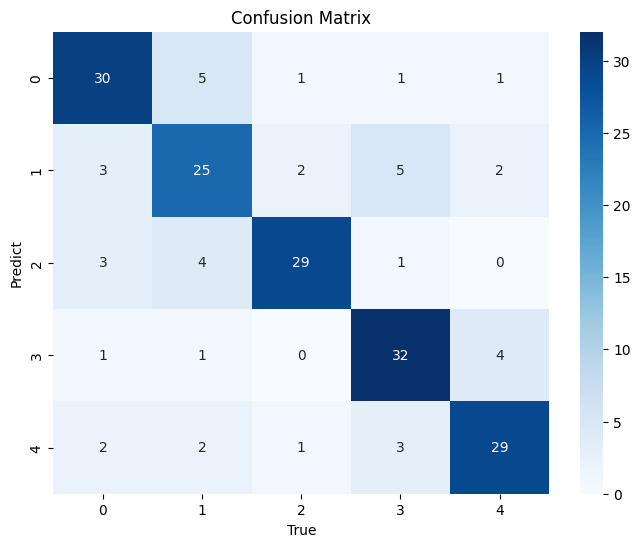

In [190]:
cm = confusion_matrix(y_test_normal, y_pred_dtc)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

## 8. Evaluasi

Melakukan evaluasi antar algoritma yang sudah digunakan untuk mengetahui jenis model algoritma yang terbaik.

In [191]:
model_comp1 = pd.DataFrame({'Model': ['K-Nearest Neighbors (KNN)', 'Random Forest', 'XGBoost', 'Decision Tree'],
                            'Accuracy': [accuracy_score_knn*100, accuracy_score_rf*100, accuracy_score_xgb*100, accuracy_score_dtr*100]})
model_comp1 = model_comp1.sort_values(by='Accuracy', ascending=False)
model_comp1.head()

,Model,Accuracy
1,Random Forest,92.0
2,XGBoost,90.4
3,Decision Tree,77.0
0,K-Nearest Neighbors (KNN),75.4


In [192]:
# Setelah Oversampling dan Normalisasi
model_comp2 = pd.DataFrame({'Model': ['KNN + St', 'Random Forest', 'XGBoost', 'Decision Tree'],
                            'Accuracy': [accuracy_score_knn_smote*100, accuracy_score_rf_smote*100, accuracy_score_xgb_smote*100, 
                                         accuracy_score_dtc_smote*100]})
model_comp2 = model_comp2.sort_values(by='Accuracy', ascending=False)
model_comp2.head()

,Model,Accuracy
1,Random Forest,92.0
2,XGBoost,90.4
0,KNN + St,86.1
3,Decision Tree,77.0


In [193]:
# Setelah Oversampling, Normalisasi, dan Hyperparameter Tuning
model_comp3 = pd.DataFrame({'Model': ['K-Nearest Neighbors (KNN)', 'Random Forest', 'XGBoost', 'Decision Tree'],
                            'Accuracy': [accuracy_score_knn_smote_tun*100, accuracy_score_rf_smote_tun*100, accuracy_score_xgb_smote_tun*100, 
                                         accuracy_score_dtc_smote_tun*100]})
model_comp3 = model_comp3.sort_values(by='Accuracy', ascending=False)
model_comp3.head()

,Model,Accuracy
0,K-Nearest Neighbors (KNN),92.0
1,Random Forest,91.4
2,XGBoost,90.9
3,Decision Tree,77.5


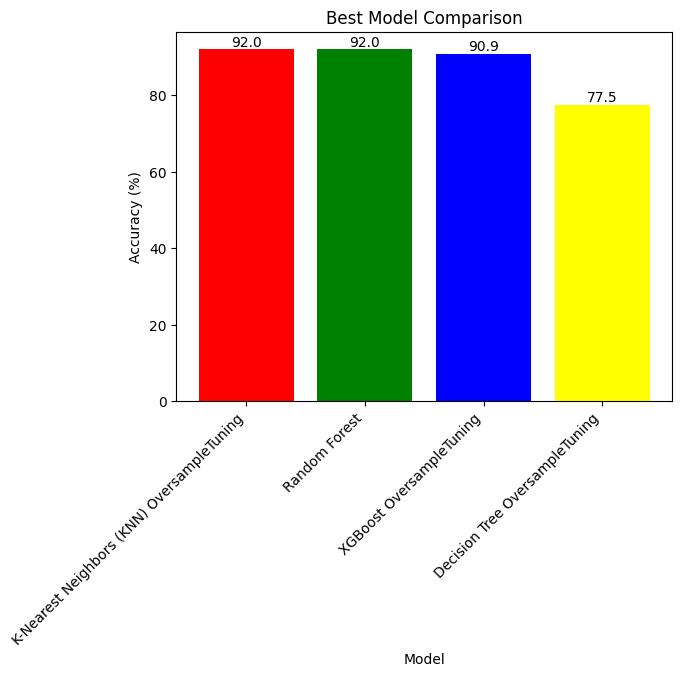

In [194]:
model_bestcomp = pd.DataFrame({
    'Model': ['K-Nearest Neighbors (KNN) OversampleTuning', 'Random Forest', 'XGBoost OversampleTuning', 'Decision Tree OversampleTuning'],
    'Accuracy': [accuracy_score_knn_smote_tun*100, accuracy_score_rf*100, accuracy_score_xgb_smote_tun*100, 
                accuracy_score_dtc_smote_tun*100]
})

# Membuat bar plot
fig, ax = plt.subplots()
bars = ax.bar(model_bestcomp['Model'], model_bestcomp['Accuracy'], color=['red', 'green', 'blue', 'yellow'])
plt.title('Best Model Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=45, ha='right')

# Menambahkan label pada bar plot
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

## 9. Deployment

## 10. Kesimpulan

Pada Project yang sudah dilakukan ini, terdapat beberapa hal yang sudah dilakukan seperti:
1. Pengumpulan data     : data yang digunakan tidak terstruktur.
2. Preprocessing data   : Mulai dari melakukan cleaning data, cek missing value, merubah type data object menjadi string, merubah nilai -9.0 menjadi nan/null serta melakukan penghapusan kolom yang terlalu banyak missing value.
3. Seleksi Fitur        : Memilih fitur yang digunakan, agar akurasi pada model bagus. Serta melakukan korelasi data.
4. Kontruksi Data       : untuk melihat distribusi data, melakukan penyeimbangan data dengan SMOTE. melakukan normalisasi data serta splitting data 20% data test, 80% data training.
5. Pemodelan            : Melakukan modeling, algoritma yang digunakan KNN, RandomForest, XGBoost dan Decision Tree. Membandingkan hasil akurasi dari berbagai uji coba dengan data oversampling, normalisasi, serta hypertuning parameter.
6. Evaluasi             : Dari hasil yang didapatkan keempat algoritma yang digunakan mendapatkan hasil KNN->75.4%, RandomForest->92.0%, XGBoost->90.4%, DecisionTree->77.0% hanya menggunakan data oversampling, KNN->86.4%, RandomForest->92.0%, XGBoost->90.4%, DecisionTree->77.0% dengan data oversampling dan normalisasi, KNN->92.0%, RandomForest->90.04%, XGBoost->90.4%, DecisionTree->79.7% 

Kesimpulan Dari semua algoritma yang sudah digunakan model K-Nearest Neighbors(OversampleTuning) dan RandomForest mempunyai hasil akurasi paling tinggi yaitu 92.0%.